In [1]:
import pandas as pd
import matplotlib.pyplot as plt

xlsx_path = "../data_clean/Superstore_Cleaned.xlsx"
df = pd.read_excel(xlsx_path, sheet_name="Master")

df.shape, df.columns.tolist()[:10]


((9800, 24),
 ['Row ID',
  'Order ID',
  'Order Date',
  'Ship Date',
  'Ship Mode',
  'Customer ID',
  'Customer Name',
  'Segment',
  'Country',
  'City'])

In [2]:
df.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Year,Month,Year-Month,Ship Days,Profit Margin %,Profit Flag
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017.0,8.0,2017-08,92.0,NaN,N/A (no Profit column)
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017.0,8.0,2017-08,92.0,NaN,N/A (no Profit column)
2,3,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017.0,12.0,2017-12,NaN,NaN,N/A (no Profit column)
3,4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016.0,11.0,2016-11,NaN,NaN,N/A (no Profit column)
4,5,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016.0,11.0,2016-11,NaN,NaN,N/A (no Profit column)


In [3]:
df[["Order Date","Ship Date","Sales","Year","Month","Year-Month","Ship Days"]].describe(include="all")


,Order Date,Ship Date,Sales,Year,Month,Year-Month,Ship Days
count,3959,3815,9800.000000,3959.000000,3959.000000,9800,2676.000000
unique,NaN,NaN,NaN,NaN,NaN,49,NaN
top,NaN,NaN,NaN,NaN,NaN,NaT,NaN
freq,NaN,NaN,NaN,NaN,NaN,5841,NaN
mean,2017-03-14 18:19:11.199798016,2017-04-09 17:04:02.516382720,230.769059,2016.728467,6.452892,NaN,107.010837
min,2015-01-02 00:00:00,2015-01-04 00:00:00,0.444000,2015.000000,1.000000,NaN,0.000000
25%,2016-04-05 00:00:00,2016-04-12 00:00:00,17.248000,2016.000000,3.000000,NaN,61.000000
50%,2017-05-02 00:00:00,2017-06-06 00:00:00,54.490000,2017.000000,6.000000,NaN,122.000000
75%,2018-03-07 00:00:00,2018-05-01 00:00:00,210.605000,2018.000000,9.000000,NaN,153.000000
max,2018-12-11 00:00:00,2019-05-01 00:00:00,22638.480000,2018.000000,12.000000,NaN,214.000000


In [4]:
monthly = (
    df.groupby("Year-Month", as_index=False)["Sales"]
      .sum()
      .sort_values("Year-Month")
)
monthly.tail()


,Year-Month,Sales
44,2018-09,2.314887e+04
45,2018-10,1.755832e+04
46,2018-11,1.740727e+04
47,2018-12,1.664704e+04
48,NaT,1.389174e+06


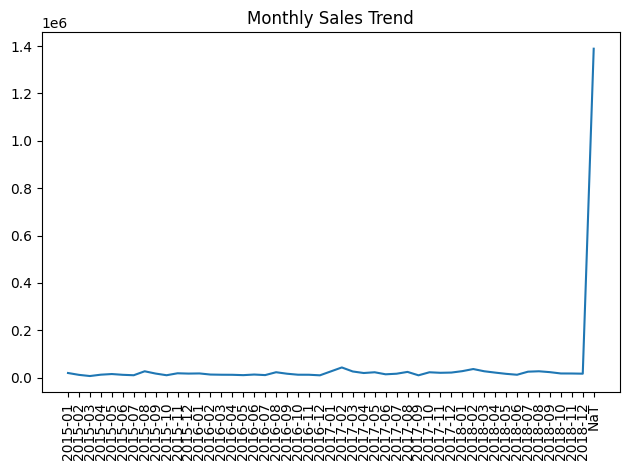

In [5]:


plt.figure()
plt.plot(monthly["Year-Month"], monthly["Sales"])
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()
